## Step 1. Download the data and prepare it for analysis
(Exploratory data analysis)

### Download all data locally

In [111]:
# Load packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

pd.set_option("display.max_rows", 10)

In [112]:
#Url Path for the data.
url1='visits_log_us.csv'
url2='orders_log_us.csv'
url3='costs_us.csv'

#Loading files locally in to dataframe
data_visits=pd.read_csv(url1)
data_orders=pd.read_csv(url2)
data_costs=pd.read_csv(url3)


### Verifying data and their types.

In [113]:
#Verifying files and data.
display(data_visits.head())
display(data_orders.head())
display(data_costs.head())

,Device,End Ts,Source Id,Start Ts,Uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168


,Buy Ts,Revenue,Uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450


,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08


In [114]:
display(data_visits.tail())
display(data_orders.tail())
display(data_costs.tail())

,Device,End Ts,Source Id,Start Ts,Uid
359395,desktop,2017-07-29 19:07:19,2,2017-07-29 19:07:00,18363291481961487539
359396,touch,2018-01-25 17:38:19,1,2018-01-25 17:38:00,18370831553019119586
359397,desktop,2018-03-03 10:12:19,4,2018-03-03 10:12:00,18387297585500748294
359398,desktop,2017-11-02 10:12:19,5,2017-11-02 10:12:00,18388616944624776485
359399,touch,2017-09-10 13:13:19,2,2017-09-10 13:13:00,18396128934054549559


,Buy Ts,Revenue,Uid
50410,2018-05-31 23:50:00,4.64,12296626599487328624
50411,2018-05-31 23:50:00,5.80,11369640365507475976
50412,2018-05-31 23:54:00,0.30,1786462140797698849
50413,2018-05-31 23:56:00,3.67,3993697860786194247
50414,2018-06-01 00:02:00,3.42,83872787173869366


,source_id,dt,costs
2537,10,2018-05-27,9.92
2538,10,2018-05-28,21.26
2539,10,2018-05-29,11.32
2540,10,2018-05-30,33.15
2541,10,2018-05-31,17.60


In [115]:
#Verifying basic informatoin and data type of all tables.
data_visits.info(memory_usage='deep')
data_orders.info(memory_usage='deep')
data_costs.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Device     359400 non-null  object
 1   End Ts     359400 non-null  object
 2   Source Id  359400 non-null  int64 
 3   Start Ts   359400 non-null  object
 4   Uid        359400 non-null  uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 79.3 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Buy Ts   50415 non-null  object 
 1   Revenue  50415 non-null  float64
 2   Uid      50415 non-null  uint64 
dtypes: float64(1), object(1), uint64(1)
memory usage: 4.4 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0 

1. Found some data for which data type can be changed like for Start Ts and End Ts data type should be datetime. 
2. Before changing the data type we first change all column name to lower case and also replace all space in coulmn names with '_'  character.

In [116]:
def update_columns_name(df):
    df.columns = df.columns.str.replace(' ', '_').str.lower()
    print(df.columns)

In [117]:
update_columns_name(data_visits)
update_columns_name(data_orders)
update_columns_name(data_costs)

Index(['device', 'end_ts', 'source_id', 'start_ts', 'uid'], dtype='object')
Index(['buy_ts', 'revenue', 'uid'], dtype='object')
Index(['source_id', 'dt', 'costs'], dtype='object')


In [118]:
#checking the table for null values.
print(data_visits.isnull().sum())
print(data_orders.isnull().sum())
print(data_costs.isnull().sum())

device       0
end_ts       0
source_id    0
start_ts     0
uid          0
dtype: int64
buy_ts     0
revenue    0
uid        0
dtype: int64
source_id    0
dt           0
costs        0
dtype: int64


In [119]:
#checking the table for duplicates values.
print(data_visits.duplicated().sum())
print(data_orders.duplicated().sum())
print(data_costs.duplicated().sum())

0
0
0


Found no null and no duploicates values. 

### Study the data they contain.

In [120]:
#checking the data in data_visits table.
display(data_visits.describe())
display(data_visits.describe(include=['object']))


,source_id,uid
count,359400.000000,3.594000e+05
mean,3.750515,9.202557e+18
std,1.917116,5.298433e+18
min,1.000000,1.186350e+13
25%,3.000000,4.613407e+18
50%,4.000000,9.227413e+18
75%,5.000000,1.372824e+19
max,10.000000,1.844668e+19


,device,end_ts,start_ts
count,359400,359400,359400
unique,2,224760,224303
top,desktop,2017-11-24 16:51:00,2017-11-24 16:06:00
freq,262567,23,19


In [121]:
data_visits['device'].unique()

array(['touch', 'desktop'], dtype=object)

Device column contain only 2 unique value so we can change the data type of this column to 'category'.

In [122]:
#checking the data in data_orders table.
display(data_orders.describe())
display(data_orders.describe(include=['object']))
#data_visits['device'].unique()
data_orders.info()

,revenue,uid
count,50415.000000,5.041500e+04
mean,4.999647,9.098161e+18
std,21.818359,5.285742e+18
min,0.000000,3.135781e+14
25%,1.220000,4.533567e+18
50%,2.500000,9.102274e+18
75%,4.890000,1.368290e+19
max,2633.280000,1.844617e+19


,buy_ts
count,50415
unique,45991
top,2018-05-31 10:13:00
freq,9


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   buy_ts   50415 non-null  object 
 1   revenue  50415 non-null  float64
 2   uid      50415 non-null  uint64 
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB


### Changing data type.

In [123]:
#Changing data type in visit table.
data_visits.info(memory_usage='deep')
data_visits['start_ts'] =  pd.to_datetime(data_visits['start_ts'], format="%Y-%m-%d %H:%M:%S")
data_visits['end_ts'] =  pd.to_datetime(data_visits['end_ts'], format="%Y-%m-%d %H:%M:%S") 
data_visits['device'] = data_visits['device'].astype('category') 
data_visits.info(memory_usage='deep')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   device     359400 non-null  object
 1   end_ts     359400 non-null  object
 2   source_id  359400 non-null  int64 
 3   start_ts   359400 non-null  object
 4   uid        359400 non-null  uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 79.3 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   device     359400 non-null  category      
 1   end_ts     359400 non-null  datetime64[ns]
 2   source_id  359400 non-null  int64         
 3   start_ts   359400 non-null  datetime64[ns]
 4   uid        359400 non-null  uint64        
dtypes: category(1), datetime64[ns](2), int64(1), uint64(1)
memory usage: 11.3 MB


In [124]:
#Changing data type in order table.
data_orders.info(memory_usage='deep')
data_orders['buy_ts'] =  pd.to_datetime(data_orders['buy_ts'], format="%Y-%m-%d %H:%M:%S")
data_orders.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   buy_ts   50415 non-null  object 
 1   revenue  50415 non-null  float64
 2   uid      50415 non-null  uint64 
dtypes: float64(1), object(1), uint64(1)
memory usage: 4.4 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   buy_ts   50415 non-null  datetime64[ns]
 1   revenue  50415 non-null  float64       
 2   uid      50415 non-null  uint64        
dtypes: datetime64[ns](1), float64(1), uint64(1)
memory usage: 1.2 MB


In [125]:
#added code v.1
#Changing data type in costs table.
data_costs.info(memory_usage='deep')
data_costs['dt'] =  pd.to_datetime(data_costs['dt'], format="%Y-%m-%d %H:%M:%S")
data_costs.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   source_id  2542 non-null   int64  
 1   dt         2542 non-null   object 
 2   costs      2542 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 206.2 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   source_id  2542 non-null   int64         
 1   dt         2542 non-null   datetime64[ns]
 2   costs      2542 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 59.7 KB


In [126]:
#added code v.1
display(data_visits['end_ts'].max())

Timestamp('2018-06-01 01:26:00')

As some values are more than May'2018 so we discard all the data greater than May'2018.

In [127]:
#added code v.1
#сheck no of the sessions which have greater time frame than the specified time interval.
data_visits[data_visits['end_ts'].dt.date>pd.to_datetime('2018-05-31')]

,device,end_ts,source_id,start_ts,uid
2330,desktop,2018-06-01 00:05:00,2,2018-05-31 23:30:00,5300693976971713685
43215,desktop,2018-06-01 00:13:00,4,2018-05-31 23:46:00,12296626599487328624
46667,desktop,2018-06-01 00:13:00,5,2018-05-31 23:48:00,1107134732939577311
154728,desktop,2018-06-01 00:09:00,2,2018-05-31 22:52:00,12484396335714047199
198329,desktop,2018-06-01 00:11:00,3,2018-05-31 23:59:00,3720373600909378583
...,...,...,...,...,...
269213,touch,2018-06-01 00:12:00,10,2018-05-31 23:59:00,10723414689244282024
288563,touch,2018-06-01 00:01:00,4,2018-05-31 23:37:00,1094281763368510391
299620,desktop,2018-06-01 00:04:00,4,2018-05-31 23:59:00,83872787173869366
342205,touch,2018-06-01 01:26:00,1,2018-05-31 23:44:00,13670831770959132678


In [128]:
#added code v.1
#fetch only those data which matches the specified time interval.
data_visits=data_visits[data_visits['end_ts'].dt.date<pd.to_datetime('2018-06-01')]
#Verify the data max date limit
data_visits[data_visits['end_ts'].dt.date>pd.to_datetime('2018-05-31')]

,device,end_ts,source_id,start_ts,uid


### Conclusion:

So far we have checked all the tables, their data and updated the data types wherever required. So now we move to next part to analyse these data and prepare the report. 

## Step 2. Make reports and calculate metrics

### Product

### - How many people use it every day, week, and month?

In [129]:
#To make analysis for every day, week and month, first we fetch year, month and week from the visit table.

data_visits['start_ts_year']  = data_visits['start_ts'].dt.year
data_visits['start_ts_month'] = data_visits['start_ts'].dt.month
data_visits['start_ts_week']  = data_visits['start_ts'].dt.week
data_visits['start_ts_date'] = data_visits['start_ts'].dt.date
print(data_visits.head()) 

    device              end_ts  source_id            start_ts  \
0    touch 2017-12-20 17:38:00          4 2017-12-20 17:20:00   
1  desktop 2018-02-19 17:21:00          2 2018-02-19 16:53:00   
2    touch 2017-07-01 01:54:00          5 2017-07-01 01:54:00   
3  desktop 2018-05-20 11:23:00          9 2018-05-20 10:59:00   
4  desktop 2017-12-27 14:06:00          3 2017-12-27 14:06:00   

                    uid  start_ts_year  start_ts_month  start_ts_week  \
0  16879256277535980062           2017              12             51   
1    104060357244891740           2018               2              8   
2   7459035603376831527           2017               7             26   
3  16174680259334210214           2018               5             20   
4   9969694820036681168           2017              12             52   

  start_ts_date  
0    2017-12-20  
1    2018-02-19  
2    2017-07-01  
3    2018-05-20  
4    2017-12-27  


In [130]:
DAU = data_visits.groupby('start_ts_date').agg({'uid': 'nunique'})
WAU = data_visits.groupby(['start_ts_year', 'start_ts_week']).agg({'uid': 'nunique'}).reset_index()
MAU = data_visits.groupby(['start_ts_year', 'start_ts_month']).agg({'uid': 'nunique'}).reset_index()


print(DAU)
print(WAU)
print(MAU) 

                uid
start_ts_date      
2017-06-01      605
2017-06-02      608
2017-06-03      445
2017-06-04      476
2017-06-05      820
...             ...
2018-05-27      620
2018-05-28     1039
2018-05-29      948
2018-05-30     1289
2018-05-31     1988

[364 rows x 1 columns]
    start_ts_year  start_ts_week   uid
0            2017             22  2021
1            2017             23  4129
2            2017             24  2812
3            2017             25  2878
4            2017             26  3064
..            ...            ...   ...
48           2018             18  3916
49           2018             19  4128
50           2018             20  5070
51           2018             21  4995
52           2018             22  4884

[53 rows x 3 columns]
    start_ts_year  start_ts_month    uid
0            2017               6  13259
1            2017               7  14183
2            2017               8  11631
3            2017               9  18975
4            2017   

In [131]:
DAU_total=DAU.uid.mean()
WAU_total=WAU.uid.mean()
MAU_total=MAU.uid.mean()

sticky_wau=DAU_total/WAU_total*100
sticky_mau=DAU_total/MAU_total*100

print('On an Average Daily {0:.0f} users visits to Yandex.Afisha'.format(DAU_total))
print('On an Average Weekly {0:.0f} users visits to Yandex.Afisha.'.format(WAU_total))
print('On an Average Monthly {0:.0f} users visits to Yandex.Afisha.'.format(MAU_total))

print('Sticky factor WAU',round(sticky_wau))
print('Sticky factor MaU',round(sticky_mau))

On an Average Daily 908 users visits to Yandex.Afisha
On an Average Weekly 5716 users visits to Yandex.Afisha.
On an Average Monthly 23228 users visits to Yandex.Afisha.
Sticky factor WAU 16
Sticky factor MaU 4


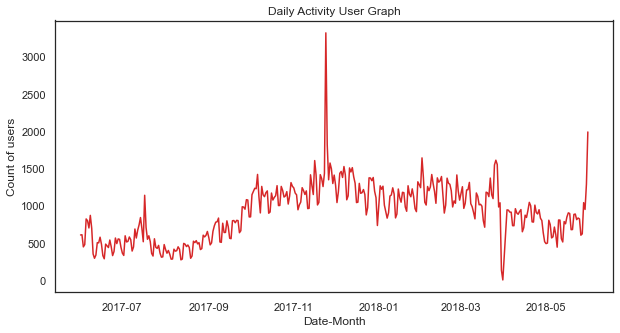

In [132]:
# Line graph for DAU.
#import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.plot(DAU.reset_index().start_ts_date,DAU.uid ,color='tab:red')
plt.title('Daily Activity User Graph')
plt.xlabel('Date-Month')
plt.ylabel('Count of users')
plt.show()

In [133]:
#print(MAU.columns)

MAU['Year-Month']=+MAU['start_ts_year'].astype(str)+'-'+MAU['start_ts_month'].astype(str)
print(MAU)

    start_ts_year  start_ts_month    uid Year-Month
0            2017               6  13259     2017-6
1            2017               7  14183     2017-7
2            2017               8  11631     2017-8
3            2017               9  18975     2017-9
4            2017              10  29692    2017-10
..            ...             ...    ...        ...
7            2018               1  28716     2018-1
8            2018               2  28749     2018-2
9            2018               3  27473     2018-3
10           2018               4  21008     2018-4
11           2018               5  20694     2018-5

[12 rows x 4 columns]


Text(0, 0.5, 'Total User')

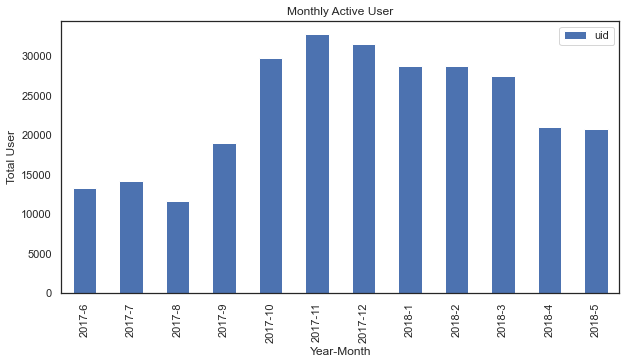

In [134]:
#Bar Graph for MAU.
#plt.figure(figsize=(10,5))
MAU.plot(kind="bar", title='Monthly Active User',x='Year-Month', y='uid', figsize=(10,5))
plt.xlabel("Year-Month")
plt.ylabel("Total User")

#### Conclusion:
1. After looking at DAU and MAU, we can say that users visits are maximum in November and December. 
2. Visists are at least in june, july, august and september.
3. As per my analyses, Users spent more time on the website in winter and spring season.

In [135]:
#WAU
WAU['Year-Week']=+WAU['start_ts_year'].astype(str)+'-'+WAU['start_ts_week'].astype(str)
print(WAU)

    start_ts_year  start_ts_week   uid Year-Week
0            2017             22  2021   2017-22
1            2017             23  4129   2017-23
2            2017             24  2812   2017-24
3            2017             25  2878   2017-25
4            2017             26  3064   2017-26
..            ...            ...   ...       ...
48           2018             18  3916   2018-18
49           2018             19  4128   2018-19
50           2018             20  5070   2018-20
51           2018             21  4995   2018-21
52           2018             22  4884   2018-22

[53 rows x 4 columns]


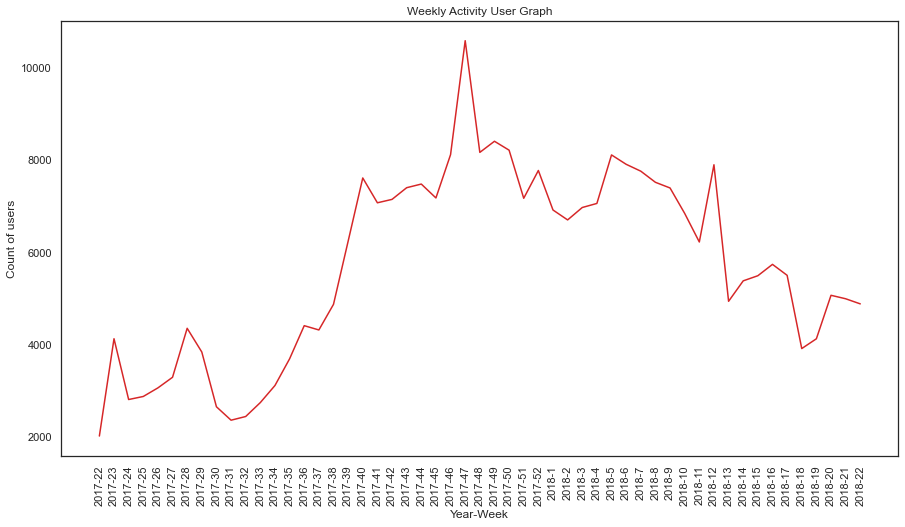

In [136]:
# Line graph for WAU.
#import matplotlib.pyplot as plt
plt.figure(figsize=(15,8))
plt.plot(WAU['Year-Week'],WAU.uid ,color='tab:red')
plt.title('Weekly Activity User Graph')
plt.xlabel('Year-Week')
plt.ylabel('Count of users')
plt.xticks(rotation=90)
plt.show()

#### Conclusion v.1
1. As per above graphs, Users spends more time in winter and spring, This could be because website sells something related to winter/spring or something like movie tickets becuase it is indoor activity and in winter people generally prefer to go for indoor activity like theatre. 
2. If we look at daily graph, in March users count reaches to zero, may be that time some technical issue arrise so nobody was able to login in to the website.
3. In the weekly graph, There is sharp increase in 2017-46, 2017-47 and 2017-48 week and decline in 2018-12 week.

### - How many sessions are there per day? (One user might have more than one session.)

In [137]:
#caculating Session per day

sessions_per_day=data_visits.groupby(['start_ts_date']).agg({'uid':['count','nunique']})
sessions_per_day.columns = ['n_sessions', 'n_users']
sessions_per_day['average_session_per_user']=sessions_per_day['n_sessions']/sessions_per_day['n_users']
sessions_per_day=sessions_per_day.sort_values(by='n_sessions',ascending=False)
sessions_per_day

,n_sessions,n_users,average_session_per_user
start_ts_date,,,
2017-11-24,4042,3319,1.217837
2018-05-31,2244,1988,1.128773
2017-11-25,2089,1817,1.149697
2018-02-01,1878,1640,1.145122
2018-03-26,1796,1609,1.116221
...,...,...,...
2017-08-06,296,282,1.049645
2017-08-12,296,271,1.092251
2017-08-13,293,281,1.042705


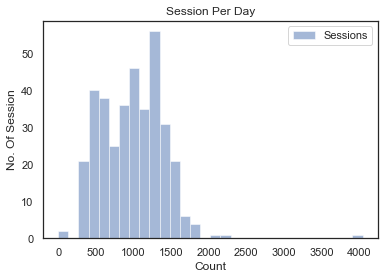

In [138]:
kwargs=dict(alpha=0.5,bins=30)
plt.hist(sessions_per_day['n_sessions'],**kwargs, label='Sessions')
plt.gca().set(title='Session Per Day')
plt.ylabel('No. Of Session') 
plt.xlabel('Count') 
plt.legend()
plt.show()

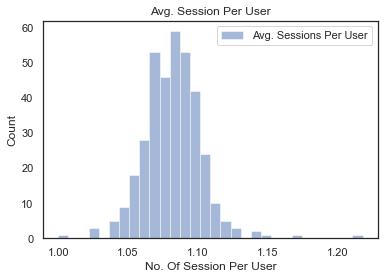

In [139]:
#code added v.1
kwargs=dict(alpha=0.5,bins=30)
plt.hist(sessions_per_day['average_session_per_user'],**kwargs, label='Avg. Sessions Per User')
plt.gca().set(title='Avg. Session Per User')
plt.ylabel('Count') 
plt.xlabel('No. Of Session Per User') 
plt.legend()
plt.show()

As we can see from the above graph, data is not normally distributed and also there are some outlier available at 4000 so now I'll take median value to find the average session length.

In [140]:
print('There are approx. {0:.2f} no. of session per day'.format(sessions_per_day['n_sessions'].median()))

There are approx. 1003.00 no. of session per day


In [141]:
print('On an average a user has {0:.2f} no of session per day'.format(sessions_per_day['average_session_per_user'].mean()))

On an average a user has 1.08 no of session per day


In [142]:
#Split the distribution of sessions by device
sessions_per_day_by_device=data_visits.groupby(['start_ts_date','device']).agg({'uid':'count'})
sessions_per_day_by_device.columns = ['n_sessions']
sessions_per_day_by_device=sessions_per_day_by_device.reset_index()
sessions_per_day_by_device

,start_ts_date,device,n_sessions
0,2017-06-01,desktop,501
1,2017-06-01,touch,163
2,2017-06-02,desktop,498
3,2017-06-02,touch,160
4,2017-06-03,desktop,329
...,...,...,...
723,2018-05-29,touch,284
724,2018-05-30,desktop,989
725,2018-05-30,touch,421
726,2018-05-31,desktop,1536


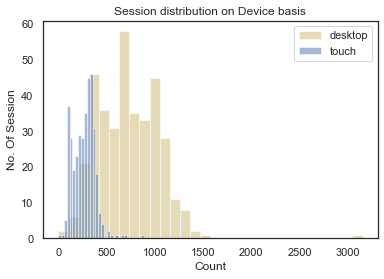

In [143]:
kwargs=dict(alpha=0.5,bins=30)
plt.hist(sessions_per_day_by_device[sessions_per_day_by_device['device']=='desktop']['n_sessions'],**kwargs,color='y',
          label='desktop')
plt.hist(sessions_per_day_by_device[sessions_per_day_by_device['device']=='touch']['n_sessions'],**kwargs,color='b',
          label='touch')
plt.gca().set(title='Session distribution on Device basis')
plt.ylabel('No. Of Session') 
plt.xlabel('Count') 
plt.legend()
plt.show()

#### Conclusion
1. On an average each user has 1 session per day.
2. After grouping the data by device wise, we can say large portion of users still uses desktop than touch devices. which may be because the website is not that much user friendly for touch/mobile devices so we can ask the team to check the cause for this. If we are able to resolve the touch device issue surely we can further increase the count of session per day.

### - What is the length of each session?

In [144]:
#Calculating session length
data_visits['session_length_sec']=(data_visits.end_ts-data_visits.start_ts).dt.seconds
data_visits.head()

,device,end_ts,source_id,start_ts,uid,start_ts_year,start_ts_month,start_ts_week,start_ts_date,session_length_sec
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017,12,51,2017-12-20,1080
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018,2,8,2018-02-19,1680
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017,7,26,2017-07-01,0
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018,5,20,2018-05-20,1440
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017,12,52,2017-12-27,0


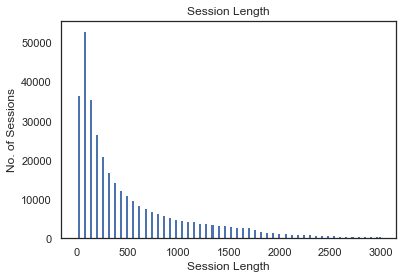

In [145]:
#plot histograme for session length.
plt.hist(data_visits['session_length_sec'],bins=100,range=[0,3000]) 
plt.title('Session Length')
plt.xlabel('Session Length')
plt.ylabel('No. of Sessions')
plt.show()

As distribution is not normal so mean is not the correct value for average session length. So we will calculate median to find the average session length.

In [146]:

avg_session_len=data_visits['session_length_sec'].mode()[0]
#print(avg_seesion_len) 

In [147]:
print('Average Session length per day: {0} sec.'.format(avg_session_len)) 

Average Session length per day: 60 sec.


#### Conclusion:

So most of the users visit the app for 60 sec.

### - How often do users come back?

In [148]:
first_activity_date = data_visits.groupby(['uid'])['start_ts_date'].min()
first_activity_date.name = 'first_activity_date'
data_visits = data_visits.join(first_activity_date,on='uid', how='left') 

In [149]:
data_visits.shape

(359388, 11)

In [150]:
data_visits['start_ts_date']=pd.to_datetime(data_visits['start_ts_date'])
data_visits['first_activity_date']=pd.to_datetime(data_visits['first_activity_date'])

In [151]:
data_visits.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 359388 entries, 0 to 359399
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   device               359388 non-null  category      
 1   end_ts               359388 non-null  datetime64[ns]
 2   source_id            359388 non-null  int64         
 3   start_ts             359388 non-null  datetime64[ns]
 4   uid                  359388 non-null  uint64        
 5   start_ts_year        359388 non-null  int64         
 6   start_ts_month       359388 non-null  int64         
 7   start_ts_week        359388 non-null  int64         
 8   start_ts_date        359388 non-null  datetime64[ns]
 9   session_length_sec   359388 non-null  int64         
 10  first_activity_date  359388 non-null  datetime64[ns]
dtypes: category(1), datetime64[ns](4), int64(5), uint64(1)
memory usage: 40.5 MB


In [152]:
data_visits['start_ts_monthly'] =  data_visits['start_ts_date'].astype('datetime64[M]') #pd.to_datetime(data_visits['start_ts_year'].astype(str)  + data_visits['start_ts_month'].astype(str), format='%Y%m')
data_visits['first_activity_month'] = data_visits['first_activity_date'].astype('datetime64[M]')#pd.to_datetime((data_visits['first_activity_date'].dt.year).astype(str)+(data_visits['first_activity_date'].dt.month).astype(str),  format='%Y%m')

In [153]:
data_retention=data_visits
data_retention['cohort_lifetime_monthly'] = data_retention['start_ts_monthly'] - data_retention['first_activity_month']
data_retention['cohort_lifetime_monthly'] = data_retention['cohort_lifetime_monthly'] / np.timedelta64(1,'M')
data_retention['cohort_lifetime_monthly'] = data_retention['cohort_lifetime_monthly'].round().astype(int)
#data_visits['cohort_lifetime_monthly'] = data_visits['cohort_lifetime_monthly'].astype(int)

In [154]:
data_retention['cohort_month']=data_retention['first_activity_month'].dt.strftime('%Y-%m') 
data_retention.head()


,device,end_ts,source_id,start_ts,uid,start_ts_year,start_ts_month,start_ts_week,start_ts_date,session_length_sec,first_activity_date,start_ts_monthly,first_activity_month,cohort_lifetime_monthly,cohort_month
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017,12,51,2017-12-20,1080,2017-12-20,2017-12-01,2017-12-01,0,2017-12
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018,2,8,2018-02-19,1680,2018-02-19,2018-02-01,2018-02-01,0,2018-02
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017,7,26,2017-07-01,0,2017-07-01,2017-07-01,2017-07-01,0,2017-07
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018,5,20,2018-05-20,1440,2018-03-09,2018-05-01,2018-03-01,2,2018-03
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017,12,52,2017-12-27,0,2017-12-27,2017-12-01,2017-12-01,0,2017-12


In [155]:
cohorts_monthly = data_retention.groupby(['first_activity_month','cohort_lifetime_monthly']).agg({'uid':'nunique'}).reset_index() # Build the data frame with cohorts here

In [156]:

cohorts_monthly.head()

,first_activity_month,cohort_lifetime_monthly,uid
0,2017-06-01,0,13259
1,2017-06-01,1,1043
2,2017-06-01,2,713
3,2017-06-01,3,814
4,2017-06-01,4,909


In [157]:
initial_users_count_monthly = cohorts_monthly[cohorts_monthly['cohort_lifetime_monthly'] == 0][['first_activity_month','uid']]

In [158]:
initial_users_count_monthly.head()

,first_activity_month,uid
0,2017-06-01,13259
12,2017-07-01,13140
23,2017-08-01,10181
33,2017-09-01,16704
42,2017-10-01,25977


In [159]:
initial_users_count_monthly = initial_users_count_monthly.rename(columns={'uid':'cohort_users_monthly'})  # Rename the data frame column

In [160]:
cohorts_monthly = cohorts_monthly.merge(initial_users_count_monthly,on='first_activity_month') # Join the data frames cohorts and initital_users_count

In [161]:

cohorts_monthly.head()

,first_activity_month,cohort_lifetime_monthly,uid,cohort_users_monthly
0,2017-06-01,0,13259,13259
1,2017-06-01,1,1043,13259
2,2017-06-01,2,713,13259
3,2017-06-01,3,814,13259
4,2017-06-01,4,909,13259


In [162]:

cohorts_monthly['retention'] = cohorts_monthly['uid']/cohorts_monthly['cohort_users_monthly']  # Calculate retention rate

In [163]:

cohorts_monthly['first_activity_month'] = cohorts_monthly['first_activity_month'].dt.strftime('%Y-%m') 
cohorts_monthly=cohorts_monthly[cohorts_monthly.cohort_lifetime_monthly>0]
cohorts_monthly.head()
#data_retention_clean=data_retention[data_retention.cohort_lifetime_monthly>0]

,first_activity_month,cohort_lifetime_monthly,uid,cohort_users_monthly,retention
1,2017-06,1,1043,13259,0.078664
2,2017-06,2,713,13259,0.053775
3,2017-06,3,814,13259,0.061392
4,2017-06,4,909,13259,0.068557
5,2017-06,5,947,13259,0.071423


In [164]:

retention_pivot = cohorts_monthly.pivot_table(index='first_activity_month',columns='cohort_lifetime_monthly',values='retention',aggfunc='sum')


In [165]:
display(retention_pivot)

cohort_lifetime_monthly,1,2,3,4,5,6,7,8,9,10,11
first_activity_month,,,,,,,,,,,
2017-06,0.078664,0.053775,0.061392,0.068557,0.071423,0.061015,0.057772,0.052342,0.050833,0.040652,0.044951
2017-07,0.056088,0.051294,0.056164,0.058219,0.048174,0.045358,0.045738,0.038813,0.028615,0.027473,NaN
2017-08,0.076908,0.062862,0.062764,0.050093,0.044004,0.036342,0.039485,0.027895,0.026029,NaN,NaN
2017-09,0.085489,0.069205,0.050706,0.039392,0.037835,0.035860,0.024186,0.022809,NaN,NaN,NaN
2017-10,0.078608,0.052239,0.038958,0.034261,0.032221,0.021365,0.020364,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2017-12,0.055802,0.037993,0.031107,0.020263,0.019036,NaN,NaN,NaN,NaN,NaN,NaN
2018-01,0.059715,0.039339,0.024973,0.020244,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02,0.057080,0.025454,0.020093,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:title={'center':'Cohorts: User Retention'}, xlabel='cohort_lifetime_monthly', ylabel='first_activity_month'>

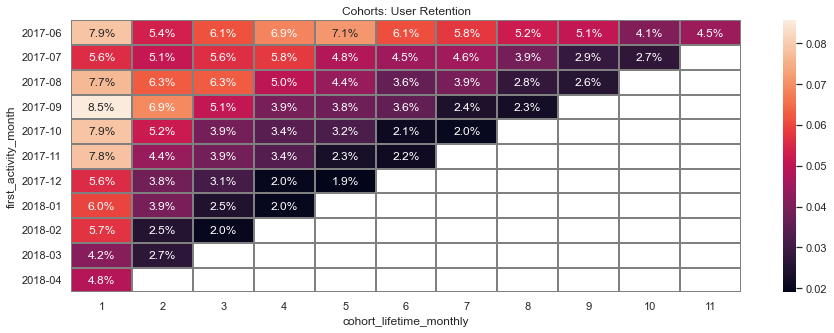

In [166]:
import seaborn as sns
from matplotlib import pyplot as plt

sns.set(style='white')
plt.figure(figsize=(15, 5))
plt.title('Cohorts: User Retention')
sns.heatmap(
    retention_pivot, annot=True, fmt='.1%', linewidths=1, linecolor='gray'
) 



##### Conclusion

1. From the above graph, we can conclude that users retention rate is decreasing drastically for every cohort in every month.
2. June 2017 till November 2017 are doing better in 1 month as compared to other cohort. Among all september cohort retention rate is best in 1st month.
3. June cohort overall retention rate is better as compared to other cohort.

### Sales

#### - When do people start buying? (In KPI analysis, we're usually interested in knowing the time that elapses between registration and conversion — when the user becomes a customer. For example, if registration and the first purchase occur on the same day, the user might fall into category Conversion 0d. If the first purchase happens the next day, it will be Conversion 1d. You can use any approach that lets you compare the conversions of different cohorts, so that you can determine which cohort, or marketing channel, is most effective.)

In [167]:
data_visits.shape

(359388, 15)

In [168]:
df_user_first_visit=data_visits.groupby('uid').agg({'start_ts':'min'}).reset_index()#['start_ts_date'].min()
df_user_first_visit.columns=['uid','first_visit']

df_user_first_order=data_orders.groupby('uid').agg({'buy_ts':'min'}).reset_index()
df_user_first_order.columns=['uid','first_order']


df_merged=df_user_first_visit.merge(df_user_first_order, on='uid', how='right')
df_merged.columns=['uid','first_visit','first_order']

df_merged.first_visit=df_merged.first_visit.fillna(df_merged.first_order)

df_merged.shape


(36523, 3)

In [169]:
#checking if there is any records for whome order date is prior to visit date.
df_merged[df_merged.first_order<df_merged.first_visit]



,uid,first_visit,first_order


In [170]:
df_merged['conversion']=(df_merged.first_order-df_merged.first_visit).dt.days.astype(int)
#df_merged['conversion']=(df_merged.buy_ts-df_merged.first_visit).dt.days.astype(int)

In [171]:
#display(df_merged.head())
#data_orders.shape

In [172]:
data_conversion=pd.merge(data_orders[['uid','revenue','buy_ts']],df_merged, on='uid',how='left')
data_conversion['cohort_month']=data_conversion['first_order'].dt.strftime('%Y-%m') 
data_conversion.head()

,uid,revenue,buy_ts,first_visit,first_order,conversion,cohort_month
0,10329302124590727494,17.00,2017-06-01 00:10:00,2017-06-01 00:09:00,2017-06-01 00:10:00,0,2017-06
1,11627257723692907447,0.55,2017-06-01 00:25:00,2017-06-01 00:14:00,2017-06-01 00:25:00,0,2017-06
2,17903680561304213844,0.37,2017-06-01 00:27:00,2017-06-01 00:25:00,2017-06-01 00:27:00,0,2017-06
3,16109239769442553005,0.55,2017-06-01 00:29:00,2017-06-01 00:14:00,2017-06-01 00:29:00,0,2017-06
4,14200605875248379450,0.37,2017-06-01 07:58:00,2017-06-01 07:31:00,2017-06-01 07:58:00,0,2017-06


In [173]:
conversion_list=[0,1,2,7,14,30]
def conversion(conversion_day,group_by):
    grouped=(data_conversion.query('conversion<=@conversion_day').groupby(group_by)['uid'].nunique()
             /data_retention.groupby(group_by)['uid'].nunique())*100
    grouped=grouped.reset_index().rename(columns={'uid':'Conversion_{}%'.format(conversion_day)})
    return grouped

In [174]:
#conversion(7,'cohort_month')

In [175]:
new_conversion=[]
for i in conversion_list:
    new_conversion.append(conversion(i,'cohort_month'))



In [176]:
#merging all columns and remove duplicates one.
new_conversion=pd.concat(new_conversion,axis=1)
new_conversion = new_conversion.loc[:,~new_conversion.columns.duplicated()]
new_conversion.head()

,cohort_month,Conversion_0%,Conversion_1%,Conversion_2%,Conversion_7%,Conversion_14%,Conversion_30%
0,2017-06,13.568142,13.982955,14.186590,14.827664,15.084094,15.257561
1,2017-07,11.643836,12.077626,12.351598,12.998478,13.432268,14.147641
2,2017-08,10.755329,11.010706,11.118751,11.629506,11.904528,12.385817
3,2017-09,11.781609,12.206657,12.434148,13.146552,13.505747,14.002634
4,2017-10,12.699696,13.138546,13.415714,14.212573,14.624475,15.217308


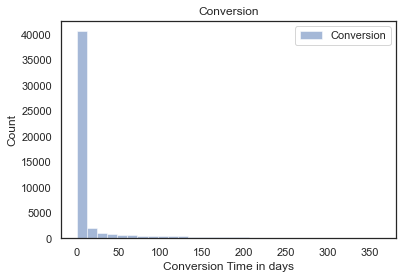

In [177]:
#Code added v.1
#Distribution of conversion
data_conversion['conversion']
kwargs=dict(alpha=0.5,bins=30)
plt.hist(data_conversion['conversion'],**kwargs, label='Conversion')
plt.gca().set(title='Conversion')
plt.ylabel('Count') 
plt.xlabel('Conversion Time in days') 
plt.legend()
plt.show()

#### Conclusion v.1
Conversion% means how much % of users finally made purchase after their first visit. <br/>
**Conversion_0%:**  means Conversion happens at 0 day. % of users made their first purchase at same day when they first visit the website. <br/>
**Conversion_1%:** means Conversion happen at 1 day. % of users made their first purchase on 1st day after their first visit. <br/>
If we see all retentions then we found that Retention is high for 0 day (Conversion_0%). and for rest of days it's increase with nominal %. like for the cohort '2017-06', 0 day conversion is 13.56% and 30 day conversion is 15.25% so in 30 days its increase by approx 2%. <br/> <br/>
which means most of the users generally made purchase the same day on which they visit for the first time. This also depicts to us that may be website is selliing tickets for which users generally come to buy. 


In [178]:
data_conversion['conversion'].describe()

count    50415.000000
mean        17.419677
std         46.352290
min          0.000000
25%          0.000000
50%          0.000000
75%          4.000000
max        363.000000
Name: conversion, dtype: float64

#### Conclusion

1. Maximum conversion takes place in 0 days.
2. It seems from the conversion that the website sells something like tickets for which user generally come to buy something. 

### - How many orders do they make during a given period of time?

In [179]:
data_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   buy_ts   50415 non-null  datetime64[ns]
 1   revenue  50415 non-null  float64       
 2   uid      50415 non-null  uint64        
dtypes: datetime64[ns](1), float64(1), uint64(1)
memory usage: 1.2 MB


In [180]:
#data_visits[['uid','source_id','first_activity_date']].drop_duplicates()

In [181]:
data_orders=data_orders.rename(columns=({'buy_ts':'order_datetime'}))
data_orders['order_year']=data_orders.order_datetime.dt.year
data_orders['order_week']=data_orders.order_datetime.dt.week
data_orders['order_date']=data_orders.order_datetime.dt.date

In [182]:
first_order_date_by_customers = data_orders.groupby('uid')[ 'order_datetime'].min()
first_order_date_by_customers.name = 'first_order_date'
data_orders = data_orders.join(first_order_date_by_customers, on='uid')
data_orders['first_order_month'] = data_orders['first_order_date'].astype('datetime64[M]')
data_orders['order_month'] = data_orders['order_datetime'].astype('datetime64[M]')
print(data_orders.head(10)) 

       order_datetime  revenue                   uid  order_year  order_week  \
0 2017-06-01 00:10:00    17.00  10329302124590727494        2017          22   
1 2017-06-01 00:25:00     0.55  11627257723692907447        2017          22   
2 2017-06-01 00:27:00     0.37  17903680561304213844        2017          22   
3 2017-06-01 00:29:00     0.55  16109239769442553005        2017          22   
4 2017-06-01 07:58:00     0.37  14200605875248379450        2017          22   
5 2017-06-01 08:43:00     0.18  10402394430196413321        2017          22   
6 2017-06-01 08:54:00     1.83  12464626743129688638        2017          22   
7 2017-06-01 09:22:00     1.22   3644482766749211722        2017          22   
8 2017-06-01 09:22:00     3.30  17542070709969841479        2017          22   
9 2017-06-01 09:23:00     0.37   1074355127080856382        2017          22   

   order_date    first_order_date first_order_month order_month  
0  2017-06-01 2017-06-01 00:10:00        2017-06-01  

In [183]:

DAU_order = data_orders.groupby('order_date').agg({'uid': 'nunique','order_datetime':'count'})
WAU_order = data_orders.groupby(['order_year', 'order_week']).agg({'uid': 'nunique','order_datetime':'count'}).reset_index()
MAU_order = data_orders.groupby(['order_year', 'order_month']).agg({'uid': 'nunique','order_datetime':'count'}).reset_index()
DAU_order=DAU_order.rename(columns=({'uid':'n_users','order_datetime':'order_count'}))
WAU_order=WAU_order.rename(columns=({'uid':'n_users','order_datetime':'order_count'}))
MAU_order=MAU_order.rename(columns=({'uid':'n_users','order_datetime':'order_count'}))
#print(int(dau_total))
print(DAU_order)
print(WAU_order)
print(MAU_order) 

            n_users  order_count
order_date                      
2017-06-01       86           96
2017-06-02      101          111
2017-06-03       61           67
2017-06-04       59           66
2017-06-05      146          161
...             ...          ...
2018-05-28      178          188
2018-05-29      174          189
2018-05-30      189          208
2018-05-31      570          610
2018-06-01        1            1

[364 rows x 2 columns]
    order_year  order_week  n_users  order_count
0         2017          22      295          340
1         2017          23      821          938
2         2017          24      317          343
3         2017          25      339          371
4         2017          26      411          460
..         ...         ...      ...          ...
48        2018          18      502          547
49        2018          19      540          635
50        2018          20      842         1004
51        2018          21      870         1027
52      

In [184]:
#Finding Average order count year, month and weekly basis.
print('The Average daily order made: {0:.2f}'.format(DAU_order.order_count.mean()))
print('The Average weekly order made: {0:.2f}'.format( WAU_order.order_count.mean()))
print('The Average monthly order made: {0:.2f}'.format( MAU_order.order_count.mean()))

The Average daily order made: 138.50
The Average weekly order made: 951.23
The Average monthly order made: 3878.08


### What is the average purchase size?

In [185]:
#data_orders.head(5)

In [186]:
print('Average purchase size: $',round(data_orders.revenue.mean()))

Average purchase size: $ 5


### - How much money do they bring? (LTV)

In [187]:
data_conversion['first_visit_month']=data_conversion['first_visit'].astype('datetime64[M]')
data_conversion['order_month']=data_conversion['buy_ts'].astype('datetime64[M]')
data_conversion.head()

,uid,revenue,buy_ts,first_visit,first_order,conversion,cohort_month,first_visit_month,order_month
0,10329302124590727494,17.00,2017-06-01 00:10:00,2017-06-01 00:09:00,2017-06-01 00:10:00,0,2017-06,2017-06-01,2017-06-01
1,11627257723692907447,0.55,2017-06-01 00:25:00,2017-06-01 00:14:00,2017-06-01 00:25:00,0,2017-06,2017-06-01,2017-06-01
2,17903680561304213844,0.37,2017-06-01 00:27:00,2017-06-01 00:25:00,2017-06-01 00:27:00,0,2017-06,2017-06-01,2017-06-01
3,16109239769442553005,0.55,2017-06-01 00:29:00,2017-06-01 00:14:00,2017-06-01 00:29:00,0,2017-06,2017-06-01,2017-06-01
4,14200605875248379450,0.37,2017-06-01 07:58:00,2017-06-01 07:31:00,2017-06-01 07:58:00,0,2017-06,2017-06-01,2017-06-01


In [188]:
#comment out below code after changes recommended by reviewer v.1
''' 
data_conversion['cohort_age'] = (data_conversion['order_month'] - data_conversion['first_visit_month']) / np.timedelta64(1, 'M')
data_conversion['cohort_age'] = data_conversion['cohort_age'].round().astype('int')
data_conversion['cohort_month_ltv'] = data_conversion['first_visit_month'].dt.strftime('%Y-%m')
data_conversion
''' 

" \ndata_conversion['cohort_age'] = (data_conversion['order_month'] - data_conversion['first_visit_month']) / np.timedelta64(1, 'M')\ndata_conversion['cohort_age'] = data_conversion['cohort_age'].round().astype('int')\ndata_conversion['cohort_month_ltv'] = data_conversion['first_visit_month'].dt.strftime('%Y-%m')\ndata_conversion\n"

In [189]:
#comment out below code after changes recommended by reviewer v.1
''' 
tot_ltv=pd.pivot_table(data_conversion,index=data_conversion['cohort_month_ltv'],columns='cohort_age', values='revenue', aggfunc='sum')
tot_ltv
''' 

" \ntot_ltv=pd.pivot_table(data_conversion,index=data_conversion['cohort_month_ltv'],columns='cohort_age', values='revenue', aggfunc='sum')\ntot_ltv\n"

In [190]:
#comment out below code after changes recommended by reviewer v.1
''' 
tot_cum_ltv=pd.pivot_table(data_conversion,index=data_conversion['cohort_month_ltv'],columns='cohort_age', values='revenue', aggfunc='sum').cumsum(axis=1)
tot_cum_ltv
''' 

" \ntot_cum_ltv=pd.pivot_table(data_conversion,index=data_conversion['cohort_month_ltv'],columns='cohort_age', values='revenue', aggfunc='sum').cumsum(axis=1)\ntot_cum_ltv\n"

In [191]:
#comment out below code after changes recommended by reviewer v.1
''' 
Avg_ltv=pd.pivot_table(data_conversion,index=data_conversion['cohort_month_ltv'],columns='cohort_age', values='revenue', aggfunc='mean')
Avg_ltv
''' 

" \nAvg_ltv=pd.pivot_table(data_conversion,index=data_conversion['cohort_month_ltv'],columns='cohort_age', values='revenue', aggfunc='mean')\nAvg_ltv\n"

In [192]:
#comment out below code after changes recommended by reviewer v.1
''' 
plt.figure(figsize=(15, 8))
plt.title('Average customer lifetime value (LTV)')
sns.heatmap(
    Avg_ltv,
    annot=True,
    fmt='.1f',
    linewidths=1,
    linecolor='gray',
) 
'''

" \nplt.figure(figsize=(15, 8))\nplt.title('Average customer lifetime value (LTV)')\nsns.heatmap(\n    Avg_ltv,\n    annot=True,\n    fmt='.1f',\n    linewidths=1,\n    linecolor='gray',\n) \n"

In [193]:
#new code added v.1

data_conversion['first_order_month']=data_conversion['first_order'].astype('datetime64[M]')
cohort_sizes=data_conversion.groupby('first_order_month').agg({'uid':'nunique'})
data_tot_revenue= data_conversion.groupby(['first_order_month','order_month']).agg({'revenue':'sum'}).reset_index()
data_ltv=data_tot_revenue.merge(cohort_sizes,on='first_order_month')

data_ltv['ltv']=data_ltv['revenue']/data_ltv['uid']
data_ltv.head()

,first_order_month,order_month,revenue,uid,ltv
0,2017-06-01,2017-06-01,9557.49,2023,4.724414
1,2017-06-01,2017-07-01,981.82,2023,0.485329
2,2017-06-01,2017-08-01,885.34,2023,0.437637
3,2017-06-01,2017-09-01,1931.30,2023,0.954671
4,2017-06-01,2017-10-01,2068.58,2023,1.022531


In [194]:
data_ltv['cohort_lifetime'] = (data_ltv['order_month'] - data_ltv['first_order_month']) / np.timedelta64(1, 'M')
data_ltv['cohort_lifetime'] = data_ltv['cohort_lifetime'].round().astype('int')
data_ltv['cohort_month_ltv'] = data_ltv['first_order_month'].dt.strftime('%Y-%m')
data_ltv.head()

,first_order_month,order_month,revenue,uid,ltv,cohort_lifetime,cohort_month_ltv
0,2017-06-01,2017-06-01,9557.49,2023,4.724414,0,2017-06
1,2017-06-01,2017-07-01,981.82,2023,0.485329,1,2017-06
2,2017-06-01,2017-08-01,885.34,2023,0.437637,2,2017-06
3,2017-06-01,2017-09-01,1931.30,2023,0.954671,3,2017-06
4,2017-06-01,2017-10-01,2068.58,2023,1.022531,4,2017-06


In [195]:
output = data_ltv.pivot_table(
    index='cohort_month_ltv',
    columns='cohort_lifetime',
    values='ltv',
    aggfunc='mean')
output = output.cumsum(axis=1).round(2)
output

cohort_lifetime,0,1,2,3,4,5,6,7,8,9,10,11
cohort_month_ltv,,,,,,,,,,,,
2017-06,4.72,5.21,5.65,6.60,7.62,8.36,9.31,9.89,10.45,11.05,11.62,11.88
2017-07,6.01,6.35,6.97,7.33,7.50,7.66,7.78,7.92,8.08,8.23,8.39,NaN
2017-08,5.28,5.75,6.21,6.60,7.09,7.38,7.59,7.99,8.28,8.47,NaN,NaN
2017-09,5.64,6.76,7.28,11.26,11.66,12.31,13.01,13.25,13.44,NaN,NaN,NaN
2017-10,5.00,5.54,5.73,5.89,6.04,6.16,6.24,6.36,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2018-02,4.16,4.44,4.51,4.59,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-03,4.84,5.14,5.46,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-04,4.66,5.19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:title={'center':'Average customer lifetime value (LTV)'}, xlabel='cohort_lifetime', ylabel='cohort_month_ltv'>

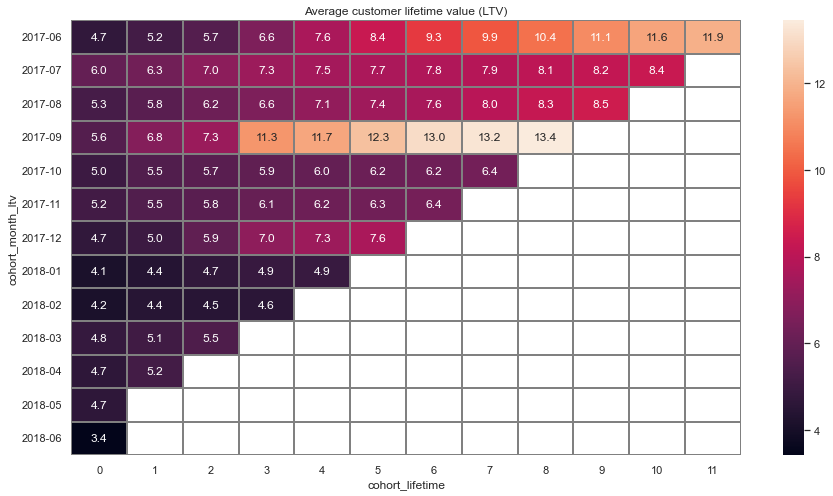

In [196]:
plt.figure(figsize=(15, 8))
plt.title('Average customer lifetime value (LTV)')
sns.heatmap(
    output,
    annot=True,
    fmt='.1f',
    linewidths=1,
    linecolor='gray',
) 

#### Conclusion
1. LTV for september and June cohorts are the best among all cohorts.
2. From 3rd month every cohort starts to pay except january and february.

In [197]:
#output[[0, 1, 2, 3, 4, 5, 6]].cumsum(axis=1).mean(axis=0) 

## Marketing

### How much money was spent? Overall/per source/over time

In [198]:
data_costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   source_id  2542 non-null   int64         
 1   dt         2542 non-null   datetime64[ns]
 2   costs      2542 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 59.7 KB


In [199]:
data_costs

,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08
...,...,...,...
2537,10,2018-05-27,9.92
2538,10,2018-05-28,21.26
2539,10,2018-05-29,11.32
2540,10,2018-05-30,33.15


In [200]:
#changing dt column datatype to datetime
data_costs['dt']=pd.to_datetime(data_costs['dt'], format="%Y-%m-%d")
data_costs=data_costs.rename(columns={'dt':'cost_date'})
data_costs

,source_id,cost_date,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08
...,...,...,...
2537,10,2018-05-27,9.92
2538,10,2018-05-28,21.26
2539,10,2018-05-29,11.32
2540,10,2018-05-30,33.15


In [201]:
data_costs['cost_month'] = data_costs['cost_date'].astype('datetime64[M]') 
data_costs

,source_id,cost_date,costs,cost_month
0,1,2017-06-01,75.20,2017-06-01
1,1,2017-06-02,62.25,2017-06-01
2,1,2017-06-03,36.53,2017-06-01
3,1,2017-06-04,55.00,2017-06-01
4,1,2017-06-05,57.08,2017-06-01
...,...,...,...,...
2537,10,2018-05-27,9.92,2018-05-01
2538,10,2018-05-28,21.26,2018-05-01
2539,10,2018-05-29,11.32,2018-05-01
2540,10,2018-05-30,33.15,2018-05-01


In [202]:
#How much money was spent? Overall
print('Overall money spent : ',data_costs['costs'].sum())

Overall money spent :  329131.62


Text(0, 0.5, 'Total Cost')

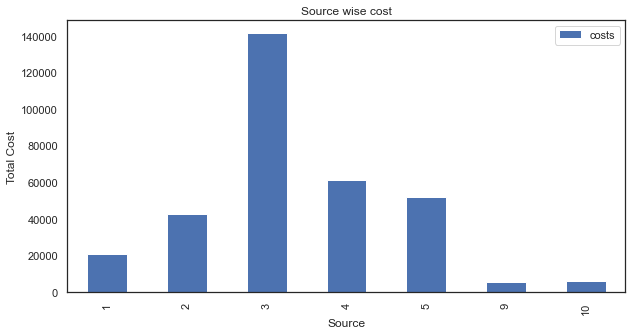

In [203]:
#How much money was spent? per source
data_source_cost=data_costs.groupby('source_id')['costs'].sum().reset_index()
data_source_cost.plot(kind="bar", title='Source wise cost',x='source_id', y='costs', figsize=(10,5))
plt.xlabel("Source")
plt.ylabel("Total Cost")

Money was spent mostly on source_id=3

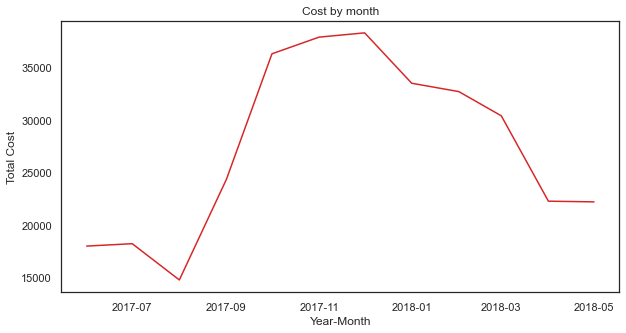

In [204]:

#How much money was spent? over time
data_cost_month=data_costs.groupby('cost_month')['costs'].sum().reset_index()
data_cost_month
plt.figure(figsize=(10,5))
plt.plot(data_cost_month['cost_month'], data_cost_month['costs'],color='tab:red')
plt.title('Cost by month')
plt.xlabel('Year-Month')
plt.ylabel('Total Cost')
plt.show()

#### Conclusion
1. Cost is highest for source_id=3
2. Cost starts to increase from september and reached to maximum in November and December. Later starts to decrease.

### How much did customer acquisition from each of the sources cost?

In [205]:
#cost by source for each visitors
data_cost_bySource=data_costs.groupby('source_id').agg({'costs':'sum'}).reset_index()
data_visits_bySource=data_visits.groupby('source_id').agg({'uid':'nunique'})
data_cac=data_cost_bySource.merge(data_visits_bySource, on='source_id', how='left')
data_cac['cost_per_user']=data_cac['costs']/data_cac['uid']
data_cac

,source_id,costs,uid,cost_per_user
0,1,20833.27,18998,1.096603
1,2,42806.04,26244,1.631079
2,3,141321.63,74755,1.890464
3,4,61073.60,83523,0.731219
4,5,51757.10,56972,0.908466
5,9,5517.49,9264,0.595584
6,10,5822.49,8066,0.721856


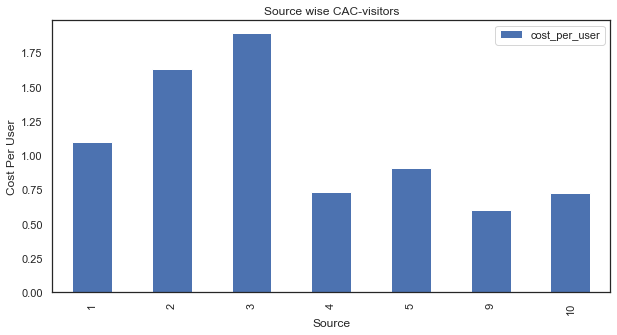

In [206]:
#Bar chart for cost by source.
data_cac.plot(kind="bar", title='Source wise CAC-visitors',x='source_id', y='cost_per_user', figsize=(10,5))
plt.xlabel("Source")
plt.ylabel("Cost Per User")
plt.show()

CAC of visitors is highest for source_id=3

In [207]:
#Calculate unique source for each user from the visit table.

user_source_count=data_visits.groupby(['uid']).agg({'source_id':['count','nunique','min']}).reset_index()
user_source_count.columns=['uid','source_count','source_unique','source_id_single']
# Getting only those users who have single source
user_source_single=user_source_count[user_source_count.source_unique==1]


#Getting Users who have multiple sources and then find/update most common source for each user.
user_source_multi=user_source_count[user_source_count.source_unique>1].merge(data_visits[['uid','source_id']], on='uid', how='inner')
user_source_multi=user_source_multi.groupby(['uid'])['source_id'].agg(lambda x: x.mode()[0]).reset_index()

#remove all duplicate record.
user_source_single.rename(columns={'source_id_single':'source_id'},inplace=True)
user_source_single=user_source_single[['uid','source_id']]
user_source_single=user_source_single.drop_duplicates()
#remove all duplicate record.
user_source_multi=user_source_multi.drop_duplicates().reset_index()
#append tables.
user_source_final=user_source_single.append(user_source_multi)
user_source_final=user_source_final[['uid','source_id']].drop_duplicates().reset_index()
user_source_final


,index,uid,source_id
0,0,11863502262781,3
1,1,49537067089222,2
2,2,297729379853735,3
3,3,313578113262317,2
4,4,325320750514679,5
...,...,...,...
228157,37714,18445407535914413204,3
228158,37715,18445456946869452085,3
228159,37716,18445601152732270159,2
228160,37717,18445884613277162497,1


In [208]:
#changes v.1 - new code added  
#cost by source for each depositor
data_cost_bySource=data_costs.groupby('source_id').agg({'costs':'sum'}).reset_index()
df_depositor_count=pd.merge(data_orders[['uid']],user_source_final, on='uid',how='inner')
data_depositer_bySource=df_depositor_count.groupby('source_id').agg({'uid':'nunique'})
data_cac_dep=data_cost_bySource.merge(data_depositer_bySource, on='source_id', how='left')
data_cac_dep['cost_per_user']=data_cac_dep['costs']/data_cac_dep['uid']
data_cac_dep

,source_id,costs,uid,cost_per_user
0,1,20833.27,5058,4.118875
1,2,42806.04,5180,8.263714
2,3,141321.63,9317,15.168147
3,4,61073.60,9323,6.550853
4,5,51757.10,5640,9.176791
5,9,5517.49,1008,5.473700
6,10,5822.49,995,5.851749


In [209]:
#changes v.1 - code commented
#cost by source for each depositor
#data_cost_bySource=data_costs.groupby('source_id').agg({'costs':'sum'}).reset_index()
#data_depositer_bySource=user_source_final.groupby('source_id').agg({'uid':'nunique'})
#data_cac_dep=data_cost_bySource.merge(data_depositer_bySource, on='source_id', how='left')
#data_cac_dep['cost_per_user']=data_cac_dep['costs']/data_cac_dep['uid']
#data_cac_dep

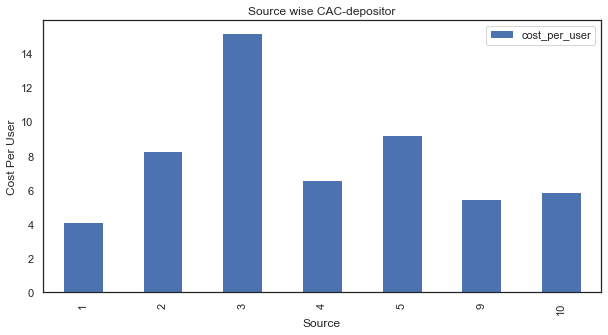

In [210]:
#Bar chart for cost by source.
data_cac_dep.plot(kind="bar", title='Source wise CAC-depositor',x='source_id', y='cost_per_user', figsize=(10,5))
plt.xlabel("Source")
plt.ylabel("Cost Per User")
plt.show()

CAC for each depositer is high for source_id =3

In [211]:
#changes v.1 - Existing code block commented
#cost by month
#data_cost_byMonth=data_costs.groupby('cost_month').agg({'costs':'sum'}).reset_index()
#data_visit_bymonth=data_visits.groupby('start_ts_monthly').agg({'uid':'nunique'}).reset_index().rename(columns={'start_ts_monthly':'cost_month'})
#data_cac_month=data_cost_byMonth.merge(data_visit_bymonth, on='cost_month', how='left')
#data_cac_month['cost_per_user']=data_cac_month['costs']/data_cac_month['uid']
#data_cac_month

In [212]:
#changes v.1 - new code added  
#cost by month
data_cost_byMonth=data_costs.groupby('cost_month').agg({'costs':'sum'}).reset_index()
data_order_bymonth=data_orders.groupby('order_month').agg({'uid':'nunique'}).reset_index().rename(columns={'order_month':'cost_month'})
data_cac_month=data_cost_byMonth.merge(data_order_bymonth, on='cost_month', how='left')
data_cac_month['cost_per_user_per_month']=data_cac_month['costs']/data_cac_month['uid']
data_cac_month

,cost_month,costs,uid,cost_per_user_per_month
0,2017-06-01,18015.00,2023,8.905091
1,2017-07-01,18240.59,1984,9.193846
2,2017-08-01,14790.54,1472,10.047921
3,2017-09-01,24368.91,2750,8.861422
4,2017-10-01,36322.88,4675,7.769600
...,...,...,...,...
7,2018-01-01,33518.52,3898,8.598902
8,2018-02-01,32723.03,4258,7.685070
9,2018-03-01,30415.27,4181,7.274640
10,2018-04-01,22289.38,2744,8.122952


In [213]:
#changes v.1 - code block commented
#cost by source for each visitors
#data_cost_bySource = data_costs.groupby('source_id').agg({'costs':'sum'}).reset_index()
#source_id = data_visits.groupby('uid').agg({'source_id' : 'mean'}).reset_index()
#data_visits_bySource = data_orders.merge(source_id, on = "uid")

#data_visits_bySource

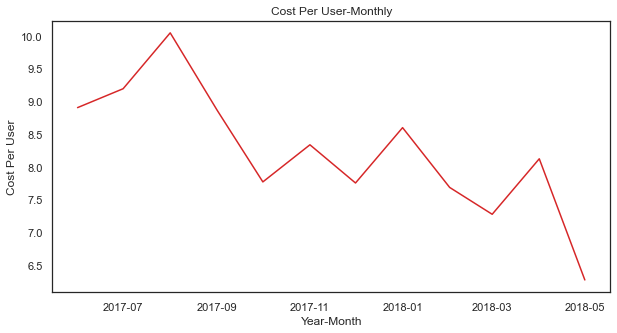

In [214]:
plt.figure(figsize=(10,5))
plt.plot(data_cac_month['cost_month'],data_cac_month['cost_per_user_per_month'],color='tab:red')
plt.title('Cost Per User-Monthly')
plt.xlabel('Year-Month')
plt.ylabel('Cost Per User')
plt.show()

Cost is highest in June, July and August.
Cost suddenly increases in november, Janauary and April and then start to decrease.

### How worthwhile where the investments? (ROI)

In [215]:
data_conversion=data_conversion.merge(user_source_final,on='uid',how='inner')
data_conversion_ltv=data_conversion.groupby(['source_id']).agg({'revenue':'sum', 'uid':'nunique'}).reset_index()
data_conversion_ltv.columns=['source_id','revenue','n_buyers']
data_conversion_ltv['ltv']= data_conversion_ltv['revenue'] / data_conversion_ltv['n_buyers']
data_romi=data_conversion_ltv.merge(data_cac_dep[['source_id','cost_per_user','costs']],on='source_id',how='outer')
data_romi['romi'] = data_romi['ltv'] / data_romi['cost_per_user']
data_romi['net_rev']=data_romi['revenue'] - data_romi['costs']
data_romi

,source_id,revenue,n_buyers,ltv,cost_per_user,costs,romi,net_rev
0,1,48606.65,5058,9.609856,4.118875,20833.27,2.333126,27773.38
1,2,74615.08,5180,14.404456,8.263714,42806.04,1.743097,31809.04
2,3,42473.70,9317,4.558731,15.168147,141321.63,0.300546,-98847.93
3,4,45707.94,9323,4.902707,6.550853,61073.60,0.748407,-15365.66
4,5,33046.69,5640,5.859342,9.176791,51757.10,0.638496,-18710.41
5,7,1.22,1,1.220000,NaN,NaN,NaN,NaN
6,9,4528.10,1008,4.492163,5.473700,5517.49,0.820681,-989.39
7,10,3074.40,995,3.089849,5.851749,5822.49,0.528022,-2748.09


## Conclusion


1. After analysing the above metric I'll recomend the market department should invest in source_id 1 and 2 as rest of the sources's net revenue are not paying. They are in loss.
2. We should discard source 3 as it has the highest cost.
3. Cost of sources starts to increase from september and reached to maximum in November and December. Later starts to decrease.
3. As we can see the retention is very low and conversion is very high for 0 days. So with that we can say that the website sells something like tickets etc. for which users gerenrally come to purchase on the same day. 
4. After grouping the data by device wise, we can say large portion of users still uses desktop than touch devices. which may be because the website is not that much user friendly for touch/mobile devices so we can ask the team to check the cause for this. 
5. After looking at DAU and MAU, we can say that daily and monthly users visits are maximum in November and December and at at minimum in june, july, august and september.
6. Overall june, september and december cohort are better with respect LTV.
7. June cohort overall retention rate is better as compared to other cohort.